# Data exploration:-

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.linear_model import LinearRegression
from google.colab import drive
drive.mount('/content/drive')
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score

data = pd.read_csv('/content/drive/MyDrive/Dataset/Supply_Chain_Dataset_New.csv', encoding='latin1', engine='python')

data.info()

Mounted at /content/drive
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 48 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Type                           180519 non-null  object 
 1   Days for shipping (real)       180519 non-null  int64  
 2   Days for shipment (scheduled)  180519 non-null  int64  
 3   Benefit per order              180519 non-null  float64
 4   Sales per customer             180519 non-null  float64
 5   Delivery Status                180519 non-null  object 
 6   Late_delivery_risk             180519 non-null  int64  
 7   Category Id                    180519 non-null  int64  
 8   Category Name                  180519 non-null  object 
 9   Customer City                  180519 non-null  object 
 10  Customer Country               180519 non-null  object 
 11  Customer Email                 180519 non-null  object 
 12  Cust

# Pre process:-

In [2]:
#drop unwanted columns
unwanted_columns =["Category Id","Customer Email","Customer Zipcode","Customer Street","Customer Fname","Customer Id","Customer Lname","Customer Segment","Latitude","Longitude","Order Customer Id","order date (DateOrders)","Order Id","Order Item Cardprod Id","Order Item Id","Order Zipcode","Product Card Id","Product Category Id","Product Status","shipping date (DateOrders)"]
data.drop(unwanted_columns, axis=1, inplace=True)

# change object data into int or float

hist_data = data.copy(deep=False)

from sklearn.preprocessing import LabelEncoder
def Change_obj_type(data):
    for column in data.columns:
        if data[column].dtype == type(object):
            le = LabelEncoder()
            data[column] = le.fit_transform(data[column])
    return data
new_data = Change_obj_type(hist_data)
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 28 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Type                           180519 non-null  int64  
 1   Days for shipping (real)       180519 non-null  int64  
 2   Days for shipment (scheduled)  180519 non-null  int64  
 3   Benefit per order              180519 non-null  float64
 4   Sales per customer             180519 non-null  float64
 5   Delivery Status                180519 non-null  int64  
 6   Late_delivery_risk             180519 non-null  int64  
 7   Category Name                  180519 non-null  int64  
 8   Customer City                  180519 non-null  int64  
 9   Customer Country               180519 non-null  int64  
 10  Customer State                 180519 non-null  int64  
 11  Market                         180519 non-null  int64  
 12  Order City                    

**Visualize x features:**

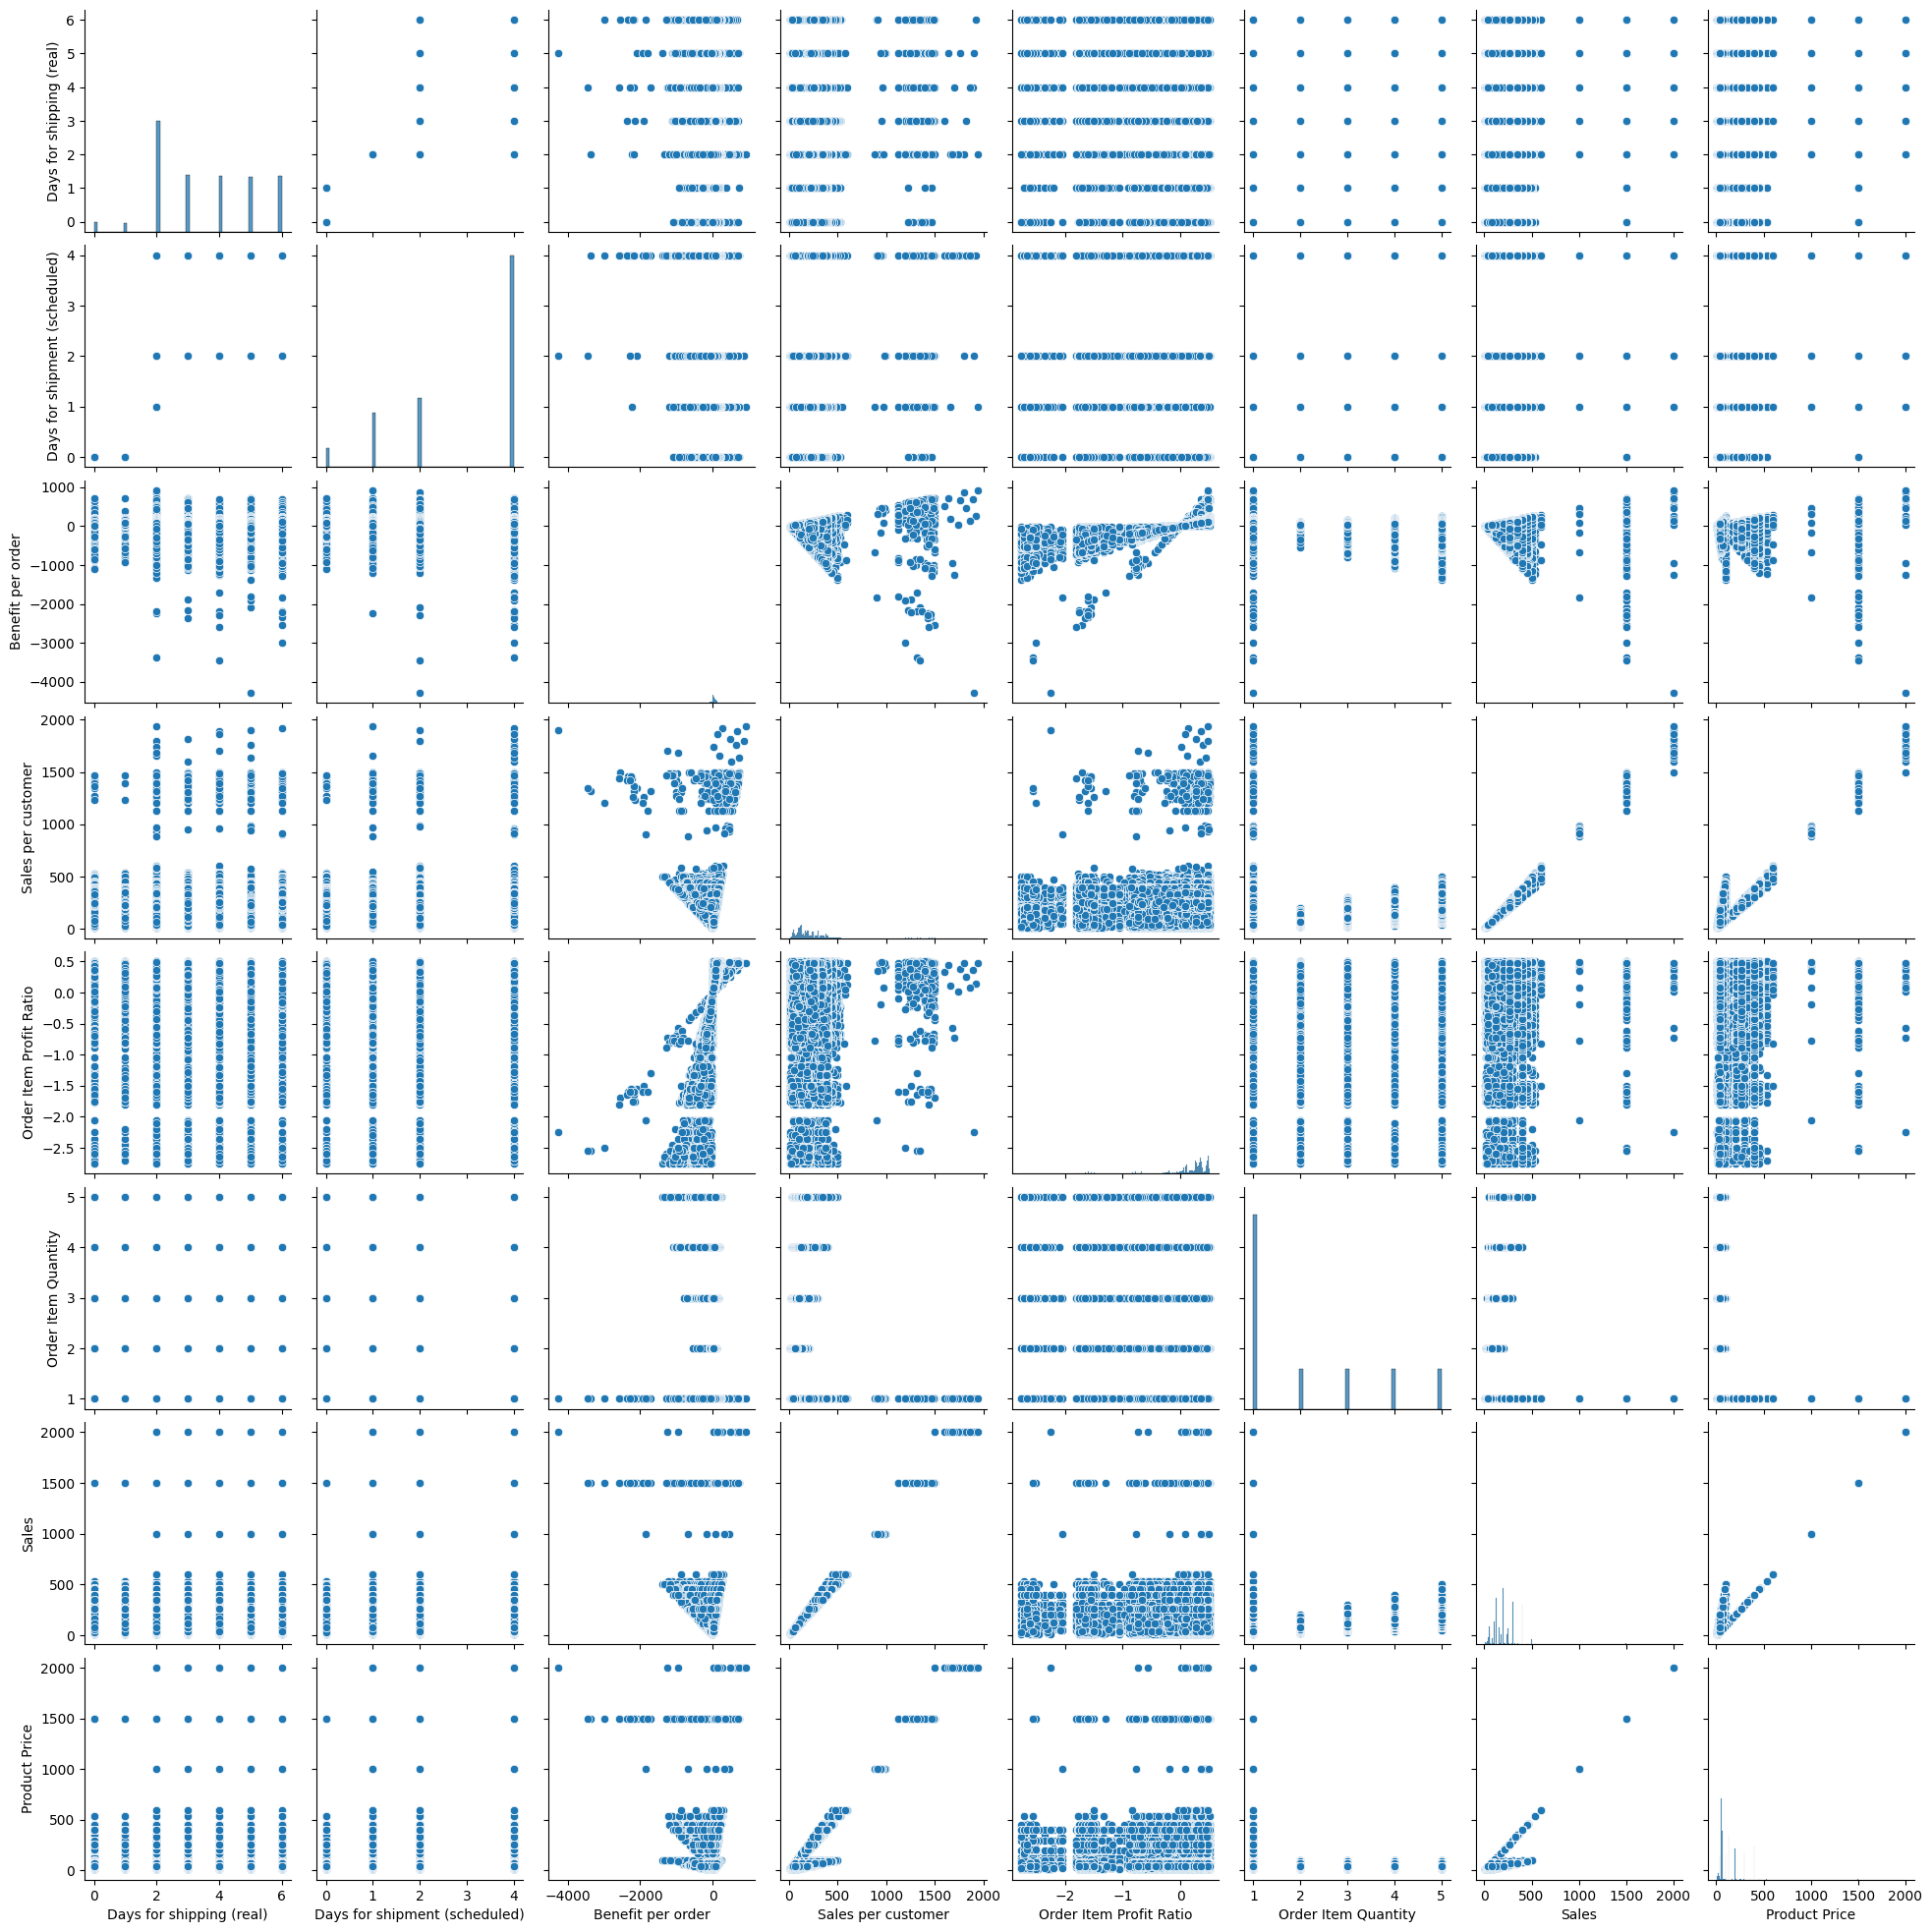

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame
# Select the features you want to plot
selected_features = ['Days for shipping (real)','Days for shipment (scheduled)', 'Benefit per order', 'Sales per customer', 'Order Item Profit Ratio', 'Order Item Quantity', 'Sales', 'Product Price']

# Create a pair plot for the selected features
sns.pairplot(new_data[selected_features])
plt.show()


SUitable pairs:
bpo vs spc,
bpo vs oipr,
bpo vs sales,
bpo vs pp,
spc vs oipr,
days for ship shed: vs days for ship real

# Model build:

1. 'Benefit per order'vs 'Sales per customer':

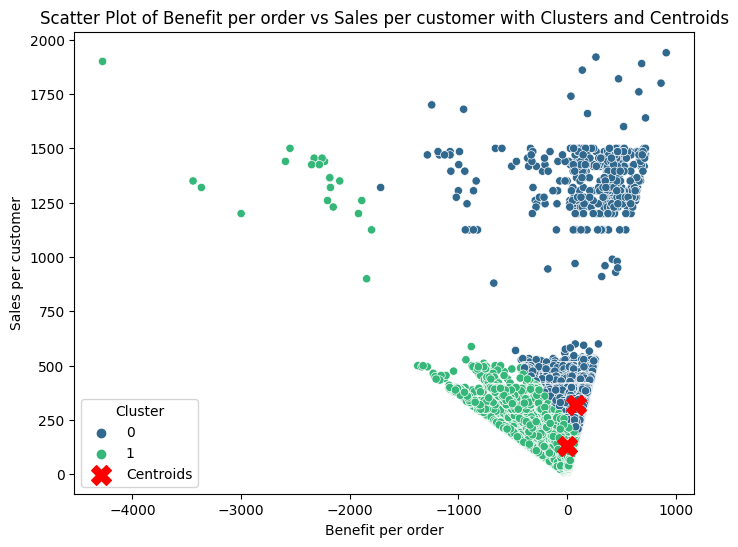

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'data' is your DataFrame
features1 = ['Benefit per order', 'Sales per customer']

# Select relevant features from the DataFrame
X1 = new_data[features1]

# Standardize the features
scaler1 = StandardScaler()
X_scaled1 = scaler1.fit_transform(X1)

# Based on the elbow method, choose the optimal number of clusters (e.g., 3)
optimal_clusters1 = 2

# Apply K-Means clustering with the optimal number of clusters
kmeans1 = KMeans(n_clusters=optimal_clusters1, init='k-means++', max_iter=300, n_init=10, random_state=42)
new_data['Cluster'] = kmeans1.fit_predict(X_scaled1)

# Get cluster centers
centroids1 = scaler1.inverse_transform(kmeans1.cluster_centers_)

# Create a scatter plot with color-coded clusters and centroids
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Benefit per order', y='Sales per customer', data=new_data, hue='Cluster', palette='viridis', markers='o')
plt.scatter(centroids1[:, 0], centroids1[:, 1], marker='X', s=200, c='red', label='Centroids')
plt.title('Scatter Plot of Benefit per order vs Sales per customer with Clusters and Centroids')
plt.xlabel('Benefit per order')
plt.ylabel('Sales per customer')
plt.legend(title='Cluster')
plt.show()


2.Benefit per order vs Order Item Profit Ratio

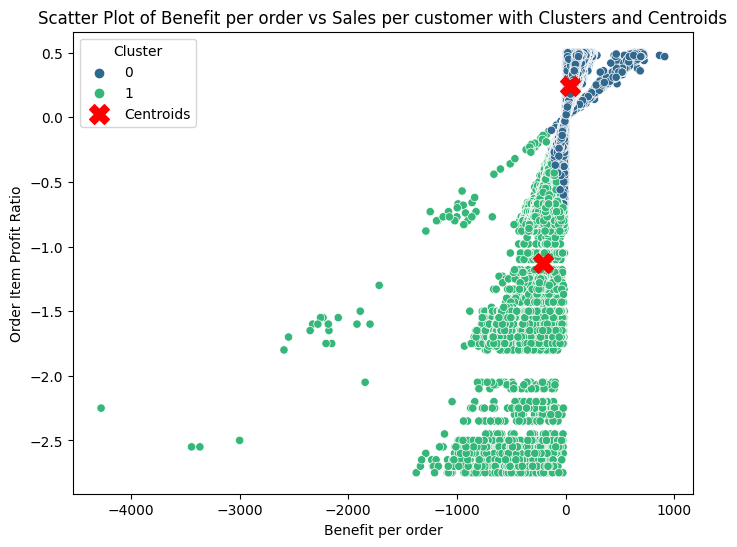

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'data' is your DataFrame
features2 = ['Benefit per order', 'Order Item Profit Ratio']

# Select relevant features from the DataFrame
X2 = new_data[features2]

# Standardize the features
scaler2 = StandardScaler()
X_scaled2 = scaler2.fit_transform(X2)

# Based on the elbow method, choose the optimal number of clusters (e.g., 3)
optimal_clusters2 = 2

# Apply K-Means clustering with the optimal number of clusters
kmeans2 = KMeans(n_clusters=optimal_clusters1, init='k-means++', max_iter=300, n_init=10, random_state=42)
new_data['Cluster'] = kmeans2.fit_predict(X_scaled2)

# Get cluster centers
centroids2 = scaler2.inverse_transform(kmeans2.cluster_centers_)

# Create a scatter plot with color-coded clusters and centroids
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Benefit per order', y='Order Item Profit Ratio', data=new_data, hue='Cluster', palette='viridis', markers='o')
plt.scatter(centroids2[:, 0], centroids2[:, 1], marker='X', s=200, c='red', label='Centroids')
plt.title('Scatter Plot of Benefit per order vs Sales per customer with Clusters and Centroids')
plt.xlabel('Benefit per order')
plt.ylabel('Order Item Profit Ratio')
plt.legend(title='Cluster')
plt.show()


3. Benefit per order vs Sales

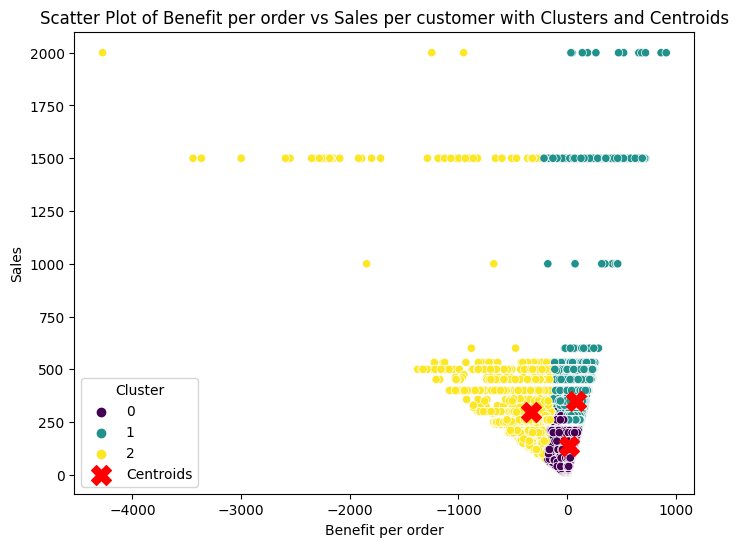

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'data' is your DataFrame
features3 = ['Benefit per order', 'Sales']

# Select relevant features from the DataFrame
X3 = new_data[features3]

# Standardize the features
scaler3 = StandardScaler()
X_scaled3 = scaler3.fit_transform(X3)

# Based on the elbow method, choose the optimal number of clusters (e.g., 3)
optimal_clusters3 = 3

# Apply K-Means clustering with the optimal number of clusters
kmeans3 = KMeans(n_clusters=optimal_clusters3, init='k-means++', max_iter=300, n_init=10, random_state=42)
new_data['Cluster'] = kmeans3.fit_predict(X_scaled3)

# Get cluster centers
centroids3 = scaler3.inverse_transform(kmeans3.cluster_centers_)

# Create a scatter plot with color-coded clusters and centroids
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Benefit per order', y='Sales', data=new_data, hue='Cluster', palette='viridis', markers='o')
plt.scatter(centroids3[:, 0], centroids3[:, 1], marker='X', s=200, c='red', label='Centroids')
plt.title('Scatter Plot of Benefit per order vs Sales with Clusters and Centroids')
plt.xlabel('Benefit per order')
plt.ylabel('Sales')
plt.legend(title='Cluster')
plt.show()


4. bpo vs Product Price:

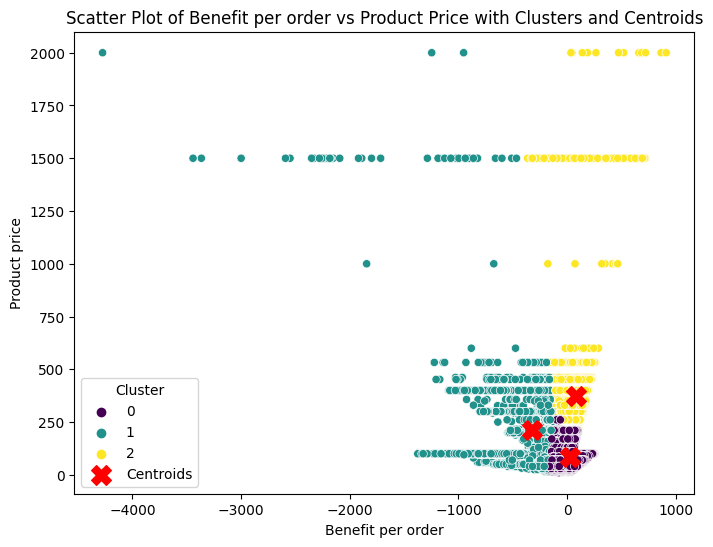

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'data' is your DataFrame
features4 = ['Benefit per order', 'Product Price']

# Select relevant features from the DataFrame
X4 = new_data[features4]

# Standardize the features
scaler4 = StandardScaler()
X_scaled4 = scaler4.fit_transform(X4)

# Based on the elbow method, choose the optimal number of clusters (e.g., 3)
optimal_clusters4 = 3

# Apply K-Means clustering with the optimal number of clusters
kmeans4 = KMeans(n_clusters=optimal_clusters4, init='k-means++', max_iter=300, n_init=10, random_state=42)
new_data['Cluster'] = kmeans4.fit_predict(X_scaled4)

# Get cluster centers
centroids4 = scaler4.inverse_transform(kmeans4.cluster_centers_)

# Create a scatter plot with color-coded clusters and centroids
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Benefit per order', y='Product Price', data=new_data, hue='Cluster', palette='viridis', markers='o')
plt.scatter(centroids4[:, 0], centroids4[:, 1], marker='X', s=200, c='red', label='Centroids')
plt.title('Scatter Plot of Benefit per order vs Product Price with Clusters and Centroids')
plt.xlabel('Benefit per order')
plt.ylabel('Product price')
plt.legend(title='Cluster')
plt.show()


5. oipr vs spc:

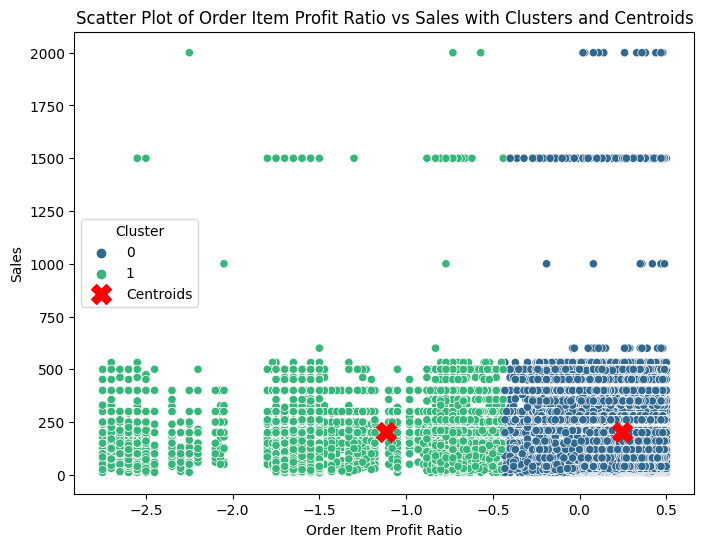

In [4]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'data' is your DataFrame
features5 = ['Order Item Profit Ratio', 'Sales']

# Select relevant features from the DataFrame
X5 = new_data[features5]

# Standardize the features
scaler5 = StandardScaler()
X_scaled5 = scaler5.fit_transform(X5)

# Based on the elbow method, choose the optimal number of clusters (e.g., 3)
optimal_clusters5 = 2

# Apply K-Means clustering with the optimal number of clusters
kmeans5 = KMeans(n_clusters=optimal_clusters5, init='k-means++', max_iter=300, n_init=10, random_state=42)
new_data['Cluster'] = kmeans5.fit_predict(X_scaled5)

# Get cluster centers
centroids5 = scaler5.inverse_transform(kmeans5.cluster_centers_)

# Create a scatter plot with color-coded clusters and centroids
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Order Item Profit Ratio', y='Sales', data=new_data, hue='Cluster', palette='viridis', markers='o')
plt.scatter(centroids5[:, 0], centroids5[:, 1], marker='X', s=200, c='red', label='Centroids')
plt.title('Scatter Plot of Order Item Profit Ratio vs Sales with Clusters and Centroids')
plt.xlabel('Order Item Profit Ratio')
plt.ylabel('Sales')
plt.legend(title='Cluster')
plt.show()


6. Days for shipping (real)  vs  Days for shipment (scheduled)

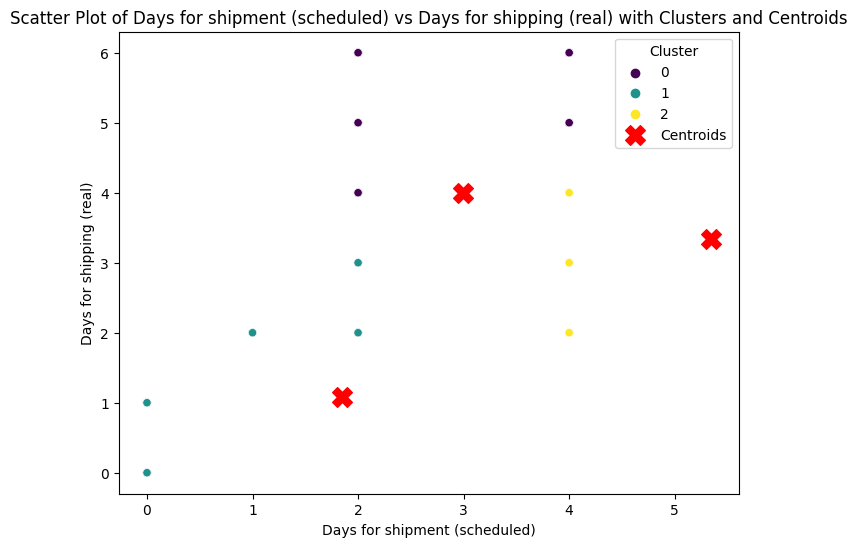

In [6]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'data' is your DataFrame
features5 = ['Days for shipping (real)', 'Days for shipment (scheduled)']

# Select relevant features from the DataFrame
X5 = new_data[features5]

# Standardize the features
scaler5 = StandardScaler()
X_scaled5 = scaler5.fit_transform(X5)

# Based on the elbow method, choose the optimal number of clusters (e.g., 3)
optimal_clusters5 = 3

# Apply K-Means clustering with the optimal number of clusters
kmeans5 = KMeans(n_clusters=optimal_clusters5, init='k-means++', max_iter=300, n_init=10, random_state=42)
new_data['Cluster'] = kmeans5.fit_predict(X_scaled5)

# Get cluster centers
centroids5 = scaler5.inverse_transform(kmeans5.cluster_centers_)

# Create a scatter plot with color-coded clusters and centroids
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Days for shipment (scheduled)', y='Days for shipping (real)', data=new_data, hue='Cluster', palette='viridis', markers='o')
plt.scatter(centroids5[:, 0], centroids5[:, 1], marker='X', s=200, c='red', label='Centroids')
plt.title('Scatter Plot of Days for shipment (scheduled) vs Days for shipping (real) with Clusters and Centroids')
plt.xlabel('Days for shipment (scheduled)')
plt.ylabel('Days for shipping (real)')
plt.legend(title='Cluster')
plt.show()
